In [1]:
# -------------------------------------------------------------------------------
# import packages
import import_ipynb
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------
# import scripts
from data_processing import hiring_data
import functions.algorithmic_model as am
import functions.simulation_vis as sm_vis
import functions.qualification as qual_plot

In [2]:
# data to X and y
X = hiring_data.drop(columns=['decision', 'Id', 'sport'])
y = hiring_data['decision']

beta = [0, 0.2, 0.6]

# Logistic Model - No Group Fairness

In [3]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_1 = []
labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_1 = []
qual_female_first_stage_df_lm_1 = []

qual_male_second_stage_df_lm_1 = []
qual_female_second_stage_df_lm_1 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_1, gender_shares2, 
     qual_male_first_stage, qual_female_first_stage, 
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics) = am.logistic_regression(X, y, "logistic", discrimination, enforce_fairness=False)

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_1.append(all_selected_lm_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_1.append(flat_qualification_male)
    qual_female_second_stage_df_lm_1.append(flat_qualification_female)


------------------------------
Mean: 0.34102525315109006
Mean: 0.2888
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773
------------------------------
Mean: 0.34102525315109006
Mean: 0.2888
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773
------------------------------
Mean: 0.34102525315109006
Mean: 0.2888
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773


In [4]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87]

In [5]:
fairness_metrics_list

[{'tpr_difference': 0.15325282430853138,
  'fpr_difference': 0.08631559305316754,
  'fnr_difference': 0.15325282430853138,
  'tnr_difference': 0.0863155930531675,
  'equalized_odds_difference': 0.11978420868084946,
  'male_tpr': 0.423841059602649,
  'female_tpr': 0.27058823529411763,
  'male_fpr': 0.16104868913857678,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.5761589403973509,
  'female_fnr': 0.7294117647058823,
  'male_tnr': 0.8389513108614233,
  'female_tnr': 0.9252669039145908,
  'male_cm': {'tp': 64, 'fp': 43, 'fn': 87, 'tn': 224},
  'female_cm': {'tp': 23, 'fp': 21, 'fn': 62, 'tn': 260}},
 {'tpr_difference': 0.15325282430853138,
  'fpr_difference': 0.08631559305316754,
  'fnr_difference': 0.15325282430853138,
  'tnr_difference': 0.0863155930531675,
  'equalized_odds_difference': 0.11978420868084946,
  'male_tpr': 0.423841059602649,
  'female_tpr': 0.27058823529411763,
  'male_fpr': 0.16104868913857678,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.576158940397350

In [6]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)


   beta_index  male_mean_qual  female_mean_qual
0           0       62.523588         67.709505
1           1       62.523588         67.709505
2           2       62.523588         67.709505


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


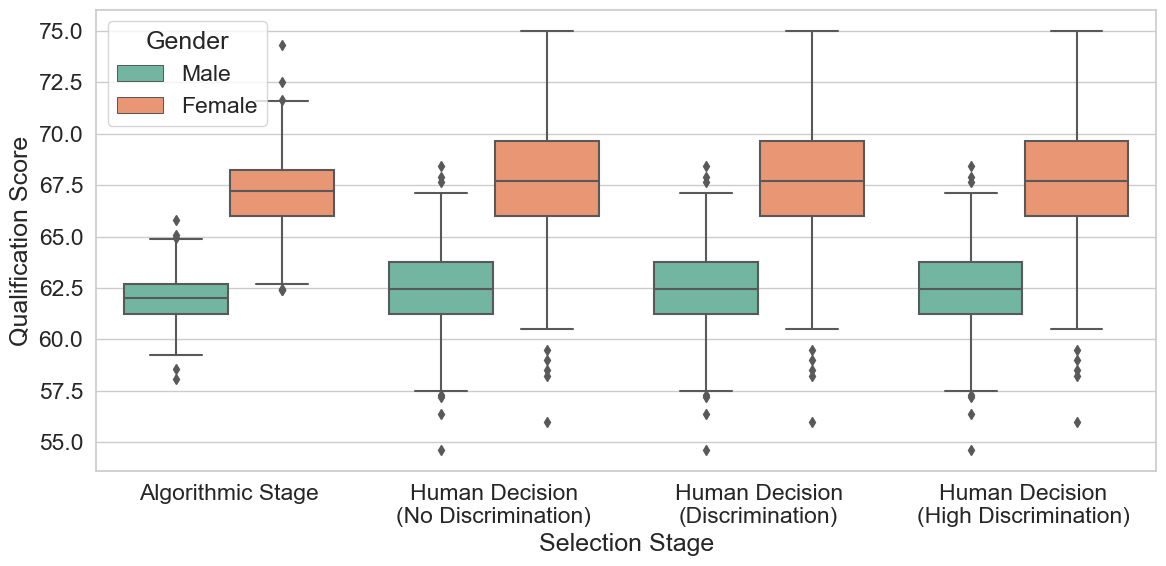

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [7]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - No Group Fairness

In [8]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_1 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_1 = []
qual_female_first_stage_df_rf_1 = []

qual_male_second_stage_df_rf_1 = []
qual_female_second_stage_df_rf_1 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_1, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics) = am.random_forest_model(X,y, "random_forest", discrimination, enforce_fairness=False)

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_rf_1.append(all_selected_rf_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_1.append(flat_qualification_male)
    qual_female_second_stage_df_rf_1.append(flat_qualification_female)

------------------------------
Mean: 0.2388046869602856
Mean: 0.21
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633
------------------------------
Mean: 0.2388046869602856
Mean: 0.21
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633
------------------------------
Mean: 0.2388046869602856
Mean: 0.21
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633


In [9]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158,
           Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158,
           Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158]

In [10]:
fairness_metrics_list

[{'tpr_difference': 0.020101285547331482,
  'fpr_difference': 0.011409226011969031,
  'fnr_difference': 0.020101285547331538,
  'tnr_difference': 0.011409226011969031,
  'equalized_odds_difference': 0.015755255779650257,
  'male_tpr': 0.6622516556291391,
  'female_tpr': 0.6823529411764706,
  'male_fpr': 0.08614232209737828,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.33774834437086093,
  'female_fnr': 0.3176470588235294,
  'male_tnr': 0.9138576779026217,
  'female_tnr': 0.9252669039145908,
  'male_cm': {'tp': 100, 'fp': 23, 'fn': 51, 'tn': 244},
  'female_cm': {'tp': 58, 'fp': 21, 'fn': 27, 'tn': 260}},
 {'tpr_difference': 0.020101285547331482,
  'fpr_difference': 0.011409226011969031,
  'fnr_difference': 0.020101285547331538,
  'tnr_difference': 0.011409226011969031,
  'equalized_odds_difference': 0.015755255779650257,
  'male_tpr': 0.6622516556291391,
  'female_tpr': 0.6823529411764706,
  'male_fpr': 0.08614232209737828,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.3

In [11]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0       62.469256             66.46
1           1       62.469256             66.46
2           2       62.469256             66.46


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


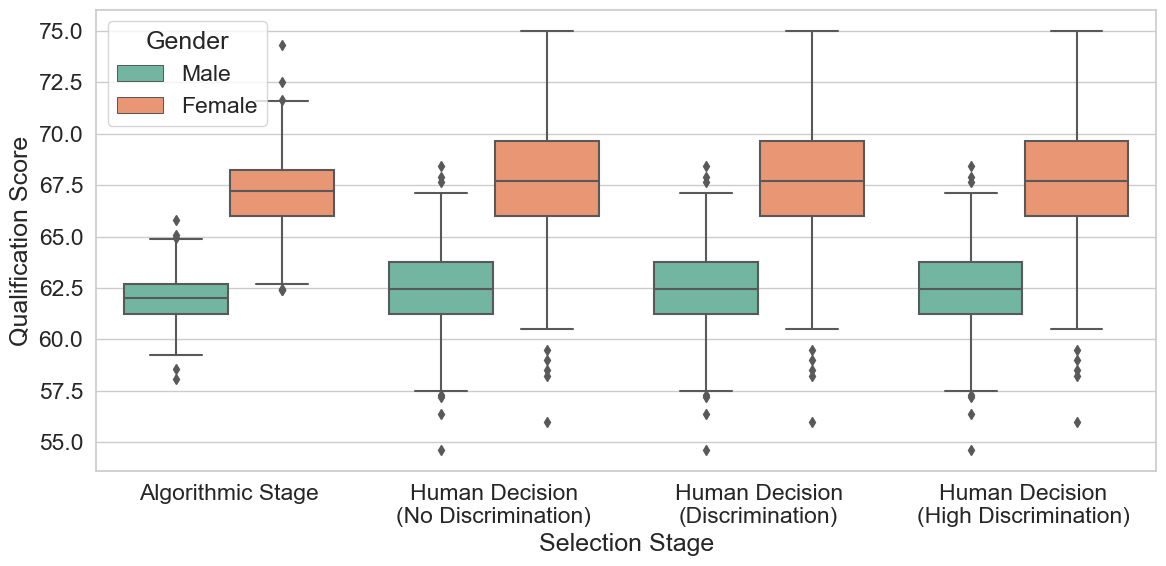

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [12]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Statistical Parity

In [13]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_2 = []
qual_female_first_stage_df_lm_2 = []

qual_male_second_stage_df_lm_2 = []
qual_female_second_stage_df_lm_2 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_lm_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_2.append(all_selected_lm_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_2.append(flat_qualification_male)
    qual_female_second_stage_df_lm_2.append(flat_qualification_female)

------------------------------
Mean: 0.06164183369593998
Mean: -0.005200000000000002
------------------------------
Mean Male Qualification: 62.05683532010215
Mean Female Qualification: 66.6300891460008
------------------------------
Mean: 0.062332253537779415
Mean: 0.091
------------------------------
Mean Male Qualification: 62.056258029249314
Mean Female Qualification: 66.62799802198288
------------------------------
Mean: 0.06182509527791008
Mean: 0.22640000000000002
------------------------------
Mean Male Qualification: 62.06432412622847
Mean Female Qualification: 66.64168303885792


In [14]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          467           81
 Actual 1          142           94,
           Predicted 0  Predicted 1
 Actual 0          467           81
 Actual 1          142           94,
           Predicted 0  Predicted 1
 Actual 0          468           80
 Actual 1          141           95]

In [15]:
fairness_metrics_list

[{'tpr_difference': 0.039423451499805195,
  'fpr_difference': 0.0033987764404814214,
  'fnr_difference': 0.039423451499805306,
  'tnr_difference': 0.003398776440481366,
  'equalized_odds_difference': 0.02141111397014331,
  'male_tpr': 0.3841059602649007,
  'female_tpr': 0.4235294117647059,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.1494661921708185,
  'male_fnr': 0.6158940397350994,
  'female_fnr': 0.5764705882352941,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8505338078291815,
  'male_cm': {'tp': 58, 'fp': 39, 'fn': 93, 'tn': 228},
  'female_cm': {'tp': 36, 'fp': 42, 'fn': 49, 'tn': 239}},
 {'tpr_difference': 0.02103622906116087,
  'fpr_difference': 0.0033987764404814214,
  'fnr_difference': 0.02103622906116087,
  'tnr_difference': 0.003398776440481366,
  'equalized_odds_difference': 0.012217502750821146,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4117647058823529,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.1494661921708185,
  'male_fnr': 0.60927

In [16]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.637838          0.702477
1           1        0.640518          0.700830
2           2        0.639418          0.698142


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


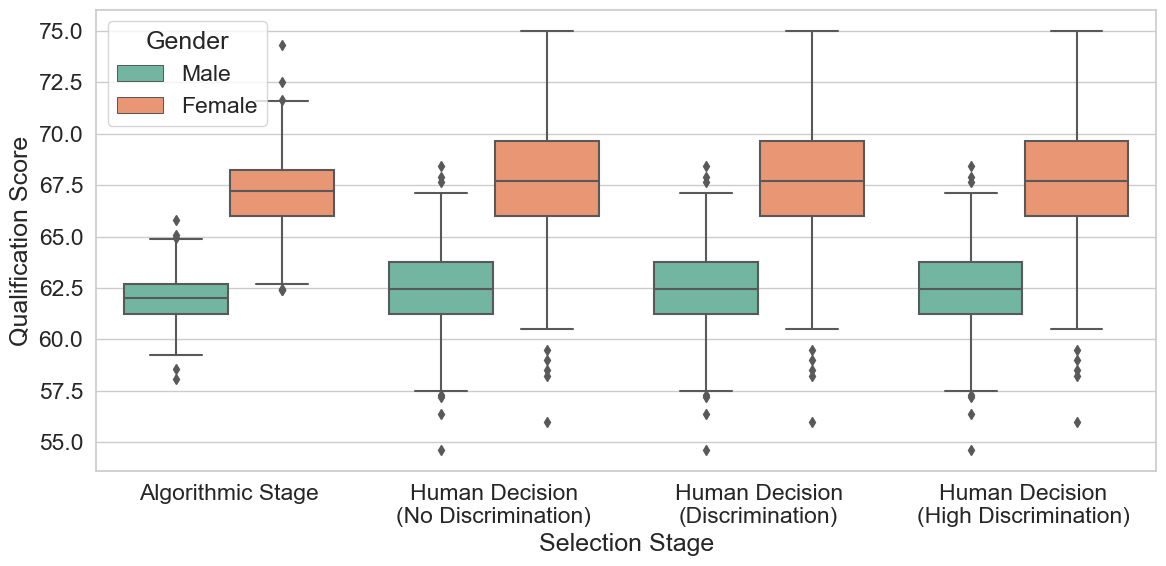

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [17]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Statistical Parity

In [18]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_2 = []
qual_female_first_stage_df_rf_2 = []

qual_male_second_stage_df_rf_2 = []
qual_female_second_stage_df_rf_2 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_rf_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_2.append(all_selected_rf_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_2.append(flat_qualification_male)
    qual_female_second_stage_df_rf_2.append(flat_qualification_female)

------------------------------
Mean: -0.002209729016982953
Mean: -0.005599999999999999
------------------------------
Mean Male Qualification: 62.39978890311261
Mean Female Qualification: 65.35251168500145
------------------------------
Mean: -0.0035072060062718677
Mean: 0.084
------------------------------
Mean Male Qualification: 62.40147600282821
Mean Female Qualification: 65.35566918882434
------------------------------
Mean: -0.0021542674287985996
Mean: 0.2398
------------------------------
Mean Male Qualification: 62.39942650597724
Mean Female Qualification: 65.3845015412978


In [19]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          481           67
 Actual 1           73          163,
           Predicted 0  Predicted 1
 Actual 0          489           59
 Actual 1           73          163,
           Predicted 0  Predicted 1
 Actual 0          485           63
 Actual 1           74          162]

In [20]:
fairness_metrics_list

[{'tpr_difference': 0.2995714842228282,
  'fpr_difference': 0.12156956828874937,
  'fnr_difference': 0.2995714842228282,
  'tnr_difference': 0.12156956828874932,
  'equalized_odds_difference': 0.2105705262557888,
  'male_tpr': 0.5827814569536424,
  'female_tpr': 0.8823529411764706,
  'male_fpr': 0.0599250936329588,
  'female_fpr': 0.18149466192170818,
  'male_fnr': 0.41721854304635764,
  'female_fnr': 0.11764705882352941,
  'male_tnr': 0.9400749063670412,
  'female_tnr': 0.8185053380782918,
  'male_cm': {'tp': 88, 'fp': 16, 'fn': 63, 'tn': 251},
  'female_cm': {'tp': 75, 'fp': 51, 'fn': 10, 'tn': 230}},
 {'tpr_difference': 0.2995714842228282,
  'fpr_difference': 0.09309981739906967,
  'fnr_difference': 0.2995714842228282,
  'tnr_difference': 0.09309981739906958,
  'equalized_odds_difference': 0.19633565081094895,
  'male_tpr': 0.5827814569536424,
  'female_tpr': 0.8823529411764706,
  'male_fpr': 0.0599250936329588,
  'female_fpr': 0.15302491103202848,
  'male_fnr': 0.41721854304635764,

In [21]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.652971          0.651600
1           1        0.654589          0.651236
2           2        0.653372          0.649137


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


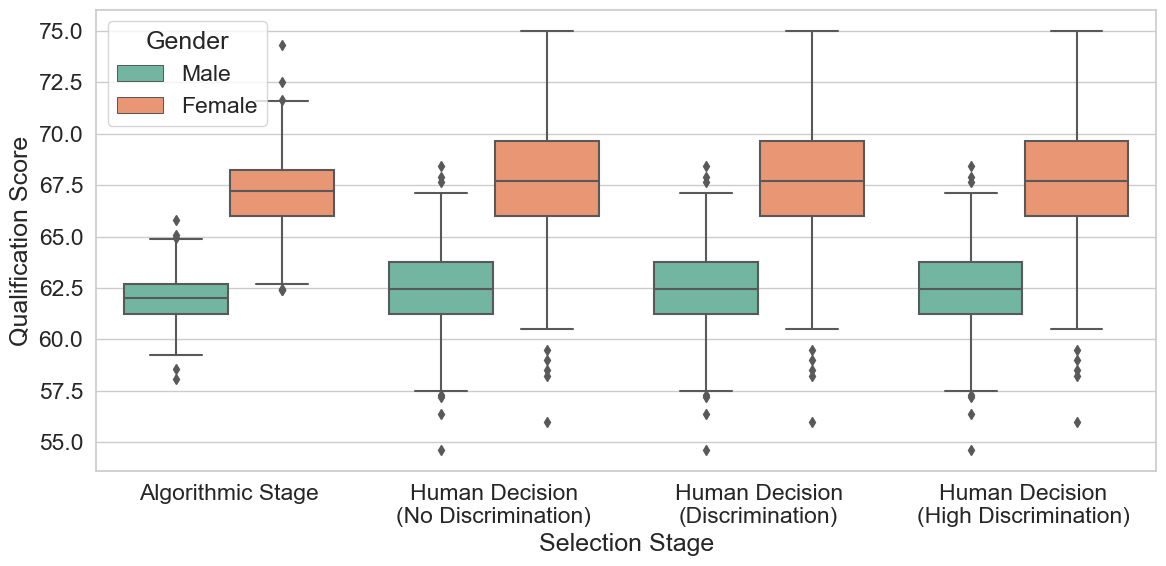

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [22]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Equalized Odds

In [23]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_3 = []
qual_female_first_stage_df_lm_3 = []

qual_male_second_stage_df_lm_3 = []
qual_female_second_stage_df_lm_3 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_lm_3.append(all_selected_lm_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_3.append(flat_qualification_male)
    qual_female_second_stage_df_lm_3.append(flat_qualification_female)

------------------------------
Mean: 0.10621405246527105
Mean: 0.055
------------------------------
Mean Male Qualification: 62.05366344160549
Mean Female Qualification: 66.60117585885556
------------------------------
Mean: 0.10529401781140994
Mean: 0.1302
------------------------------
Mean Male Qualification: 62.0528744184162
Mean Female Qualification: 66.61981090379864
------------------------------
Mean: 0.10390303121190046
Mean: 0.2594
------------------------------
Mean Male Qualification: 62.05296329749535
Mean Female Qualification: 66.62613356015397


In [24]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          470           78
 Actual 1          143           93,
           Predicted 0  Predicted 1
 Actual 0          469           79
 Actual 1          142           94,
           Predicted 0  Predicted 1
 Actual 0          473           75
 Actual 1          143           93]

In [25]:
fairness_metrics_list

[{'tpr_difference': 0.009115699259836352,
  'fpr_difference': 0.007277380143148465,
  'fnr_difference': 0.009115699259836463,
  'tnr_difference': 0.007277380143148493,
  'equalized_odds_difference': 0.008196539701492409,
  'male_tpr': 0.3973509933774834,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.1387900355871886,
  'male_fnr': 0.6026490066225165,
  'female_fnr': 0.611764705882353,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8612099644128114,
  'male_cm': {'tp': 60, 'fp': 39, 'fn': 91, 'tn': 228},
  'female_cm': {'tp': 33, 'fp': 39, 'fn': 52, 'tn': 242}},
 {'tpr_difference': 0.02103622906116087,
  'fpr_difference': 0.0037186612819384846,
  'fnr_difference': 0.02103622906116087,
  'tnr_difference': 0.00371866128193854,
  'equalized_odds_difference': 0.012377445171549678,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4117647058823529,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.1423487544483986,
  'male_fnr': 0.609271

In [26]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.640075          0.700989
1           1        0.641326          0.700162
2           2        0.641023          0.697609


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


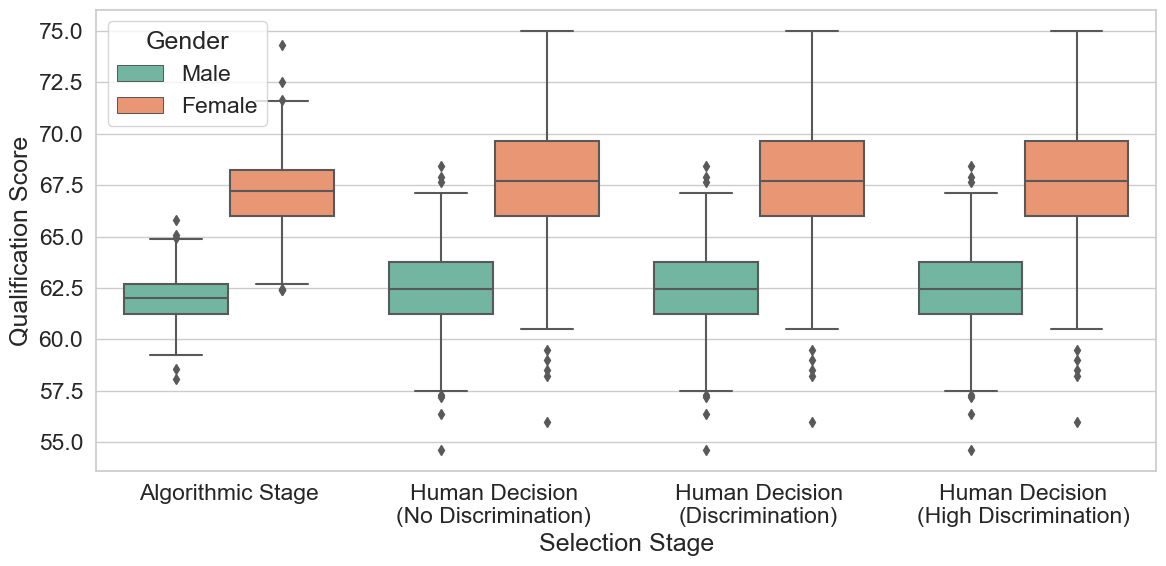

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [27]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Equalized Odds

In [28]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_3 = []
qual_female_first_stage_df_rf_3 = []

qual_male_second_stage_df_rf_3 = []
qual_female_second_stage_df_rf_3 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_3.append(all_selected_rf_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_3.append(flat_qualification_male)
    qual_female_second_stage_df_rf_3.append(flat_qualification_female)

------------------------------
Mean: 0.20186047029266235
Mean: 0.2176
------------------------------
Mean Male Qualification: 61.67459761411741
Mean Female Qualification: 65.63967192576253
------------------------------
Mean: 0.2026191186560849
Mean: 0.3054
------------------------------
Mean Male Qualification: 61.68293060845754
Mean Female Qualification: 65.63145486209264
------------------------------
Mean: 0.2015355626285621
Mean: 0.4168
------------------------------
Mean Male Qualification: 61.67813169231829
Mean Female Qualification: 65.63295381709334


In [29]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          485           63
 Actual 1           59          177,
           Predicted 0  Predicted 1
 Actual 0          487           61
 Actual 1           58          178,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1           56          180]

In [30]:
fairness_metrics_list

[{'tpr_difference': 0.02298402804830535,
  'fpr_difference': 0.0022258653551388285,
  'fnr_difference': 0.022984028048305405,
  'tnr_difference': 0.002225865355138801,
  'equalized_odds_difference': 0.012604946701722089,
  'male_tpr': 0.7417218543046358,
  'female_tpr': 0.7647058823529411,
  'male_fpr': 0.11610486891385768,
  'female_fpr': 0.11387900355871886,
  'male_fnr': 0.2582781456953642,
  'female_fnr': 0.23529411764705882,
  'male_tnr': 0.8838951310861424,
  'female_tnr': 0.8861209964412812,
  'male_cm': {'tp': 112, 'fp': 31, 'fn': 39, 'tn': 236},
  'female_cm': {'tp': 65, 'fp': 32, 'fn': 20, 'tn': 249}},
 {'tpr_difference': 0.03474873393065836,
  'fpr_difference': 0.005264771348981026,
  'fnr_difference': 0.03474873393065833,
  'tnr_difference': 0.005264771348980957,
  'equalized_odds_difference': 0.020006752639819693,
  'male_tpr': 0.7417218543046358,
  'female_tpr': 0.7764705882352941,
  'male_fpr': 0.10861423220973783,
  'female_fpr': 0.11387900355871886,
  'male_fnr': 0.258

In [31]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.657695          0.653009
1           1        0.658413          0.652987
2           2        0.659000          0.651081


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


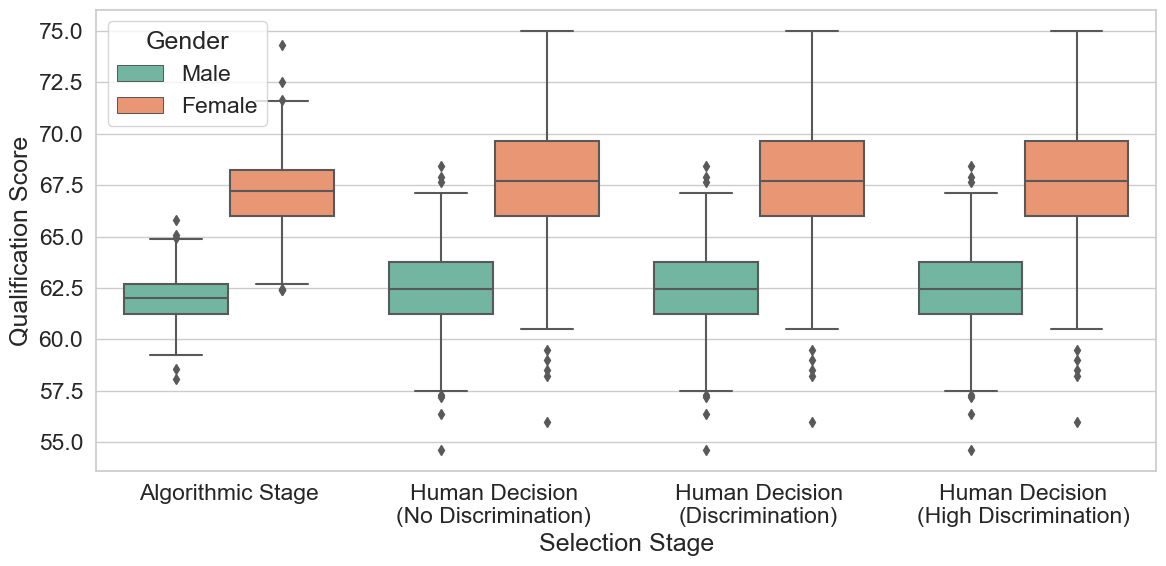

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [32]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Equal Opportunity

In [33]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_4 = []
qual_female_first_stage_df_lm_4 = []

qual_male_second_stage_df_lm_4 = []
qual_female_second_stage_df_lm_4 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_4.append(all_selected_lm_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_4.append(flat_qualification_male)
    qual_female_second_stage_df_lm_4.append(flat_qualification_female)

------------------------------
Mean: 0.1134328275026353
Mean: 0.0494
------------------------------
Mean Male Qualification: 62.05681036006811
Mean Female Qualification: 66.70651477941712
------------------------------
Mean: 0.1131647766232627
Mean: 0.1436
------------------------------
Mean Male Qualification: 62.054246161925086
Mean Female Qualification: 66.70637408605477
------------------------------
Mean: 0.11323471963286204
Mean: 0.2668
------------------------------
Mean Male Qualification: 62.06213058659077
Mean Female Qualification: 66.70453867761215


In [34]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92]

In [35]:
fairness_metrics_list

[{'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.02151225558798832,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.021512255587988305,
  'equalized_odds_difference': 0.01200271914576665,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12455516014234876,
  'male_fnr': 0.609271523178808,
  'female_fnr': 0.611764705882353,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8754448398576512,
  'male_cm': {'tp': 59, 'fp': 39, 'fn': 92, 'tn': 228},
  'female_cm': {'tp': 33, 'fp': 35, 'fn': 52, 'tn': 246}},
 {'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.02151225558798832,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.021512255587988305,
  'equalized_odds_difference': 0.01200271914576665,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12455516014234876,
  'male_fnr': 0.6

In [36]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.640290          0.701693
1           1        0.640914          0.700960
2           2        0.641649          0.697886


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


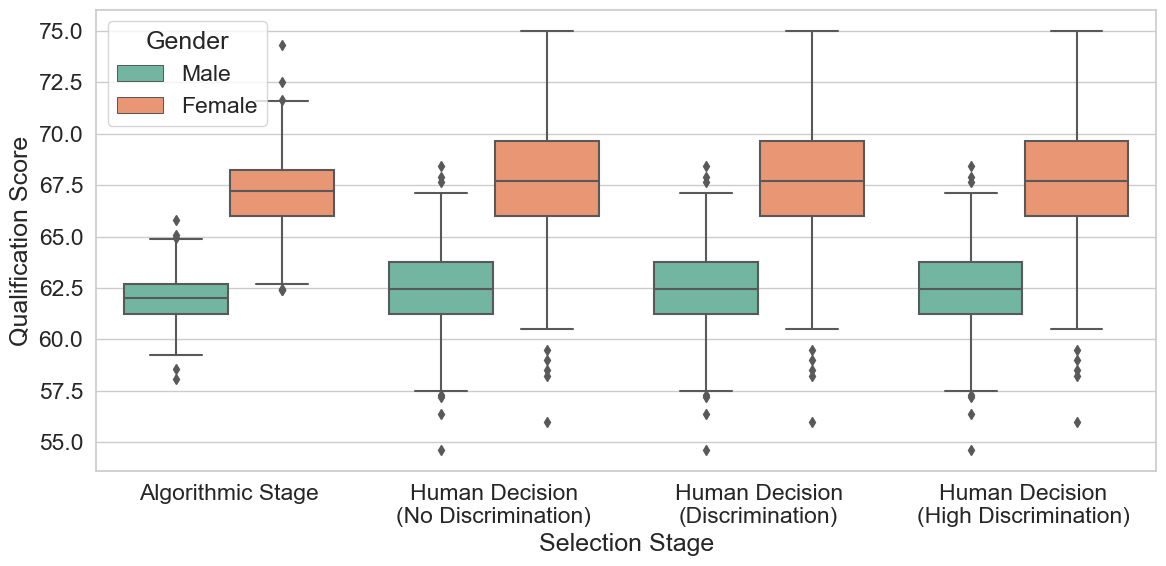

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [37]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Equal Opportunity

In [38]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_4 = []
qual_female_first_stage_df_rf_4 = []

qual_male_second_stage_df_rf_4 = []
qual_female_second_stage_df_rf_4 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_4.append(all_selected_rf_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_4.append(flat_qualification_male)
    qual_female_second_stage_df_rf_4.append(flat_qualification_female)

------------------------------
Mean: 0.1628212568488479
Mean: 0.1832
------------------------------
Mean Male Qualification: 62.13321558074894
Mean Female Qualification: 65.67755027069197
------------------------------
Mean: 0.16172793729759788
Mean: 0.2634
------------------------------
Mean Male Qualification: 62.130972336916514
Mean Female Qualification: 65.67873364358047
------------------------------
Mean: 0.16263036011438012
Mean: 0.3794
------------------------------
Mean Male Qualification: 62.130039432667125
Mean Female Qualification: 65.67622775856321


In [39]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          492           56
 Actual 1           67          169,
           Predicted 0  Predicted 1
 Actual 0          491           57
 Actual 1           70          166,
           Predicted 0  Predicted 1
 Actual 0          491           57
 Actual 1           69          167]

In [40]:
fairness_metrics_list

[{'tpr_difference': 0.09435138293728085,
  'fpr_difference': 0.002079251469470994,
  'fnr_difference': 0.09435138293728088,
  'tnr_difference': 0.0020792514694709663,
  'equalized_odds_difference': 0.04821531720337592,
  'male_tpr': 0.6821192052980133,
  'female_tpr': 0.7764705882352941,
  'male_fpr': 0.10112359550561797,
  'female_fpr': 0.10320284697508897,
  'male_fnr': 0.31788079470198677,
  'female_fnr': 0.2235294117647059,
  'male_tnr': 0.898876404494382,
  'female_tnr': 0.896797153024911,
  'male_cm': {'tp': 103, 'fp': 27, 'fn': 48, 'tn': 240},
  'female_cm': {'tp': 66, 'fp': 29, 'fn': 19, 'tn': 252}},
 {'tpr_difference': 0.05905726529022204,
  'fpr_difference': 0.012942007543950848,
  'fnr_difference': 0.05905726529022204,
  'tnr_difference': 0.012942007543950806,
  'equalized_odds_difference': 0.03599963641708644,
  'male_tpr': 0.6821192052980133,
  'female_tpr': 0.7411764705882353,
  'male_fpr': 0.09737827715355805,
  'female_fpr': 0.1103202846975089,
  'male_fnr': 0.317880794

In [41]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.661736          0.649527
1           1        0.661225          0.653389
2           2        0.658750          0.649368


DataFrame contains 3997 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(High Discrimination) Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


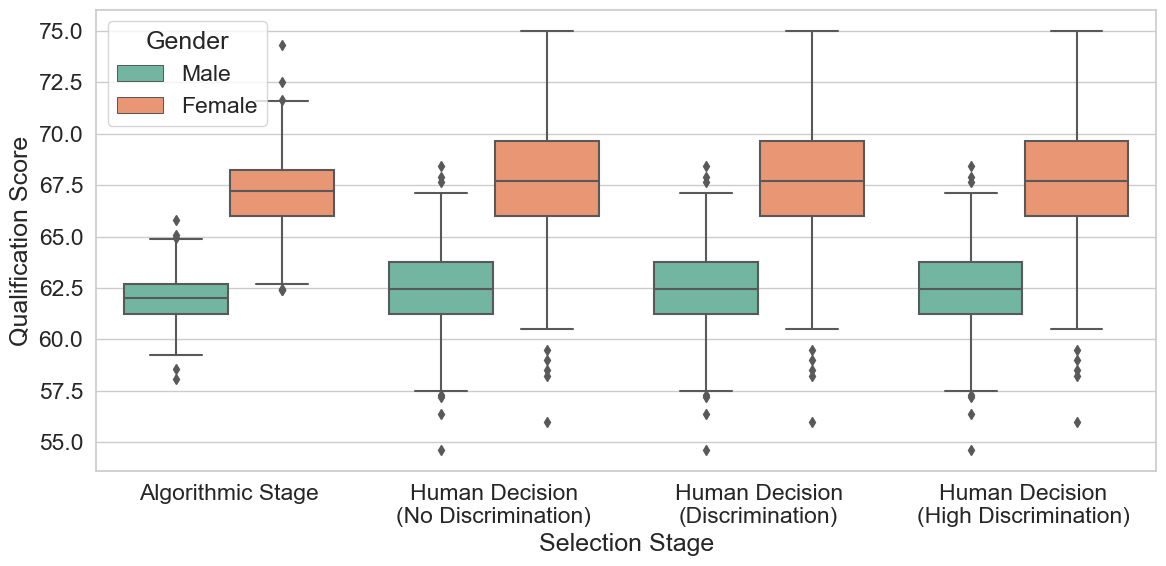

             Score
count  3997.000000
mean     64.948069
std       3.428927
min      54.625000
25%      62.166667
50%      64.647059
75%      67.545455
max      75.000000


In [42]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Simulation Evaluation

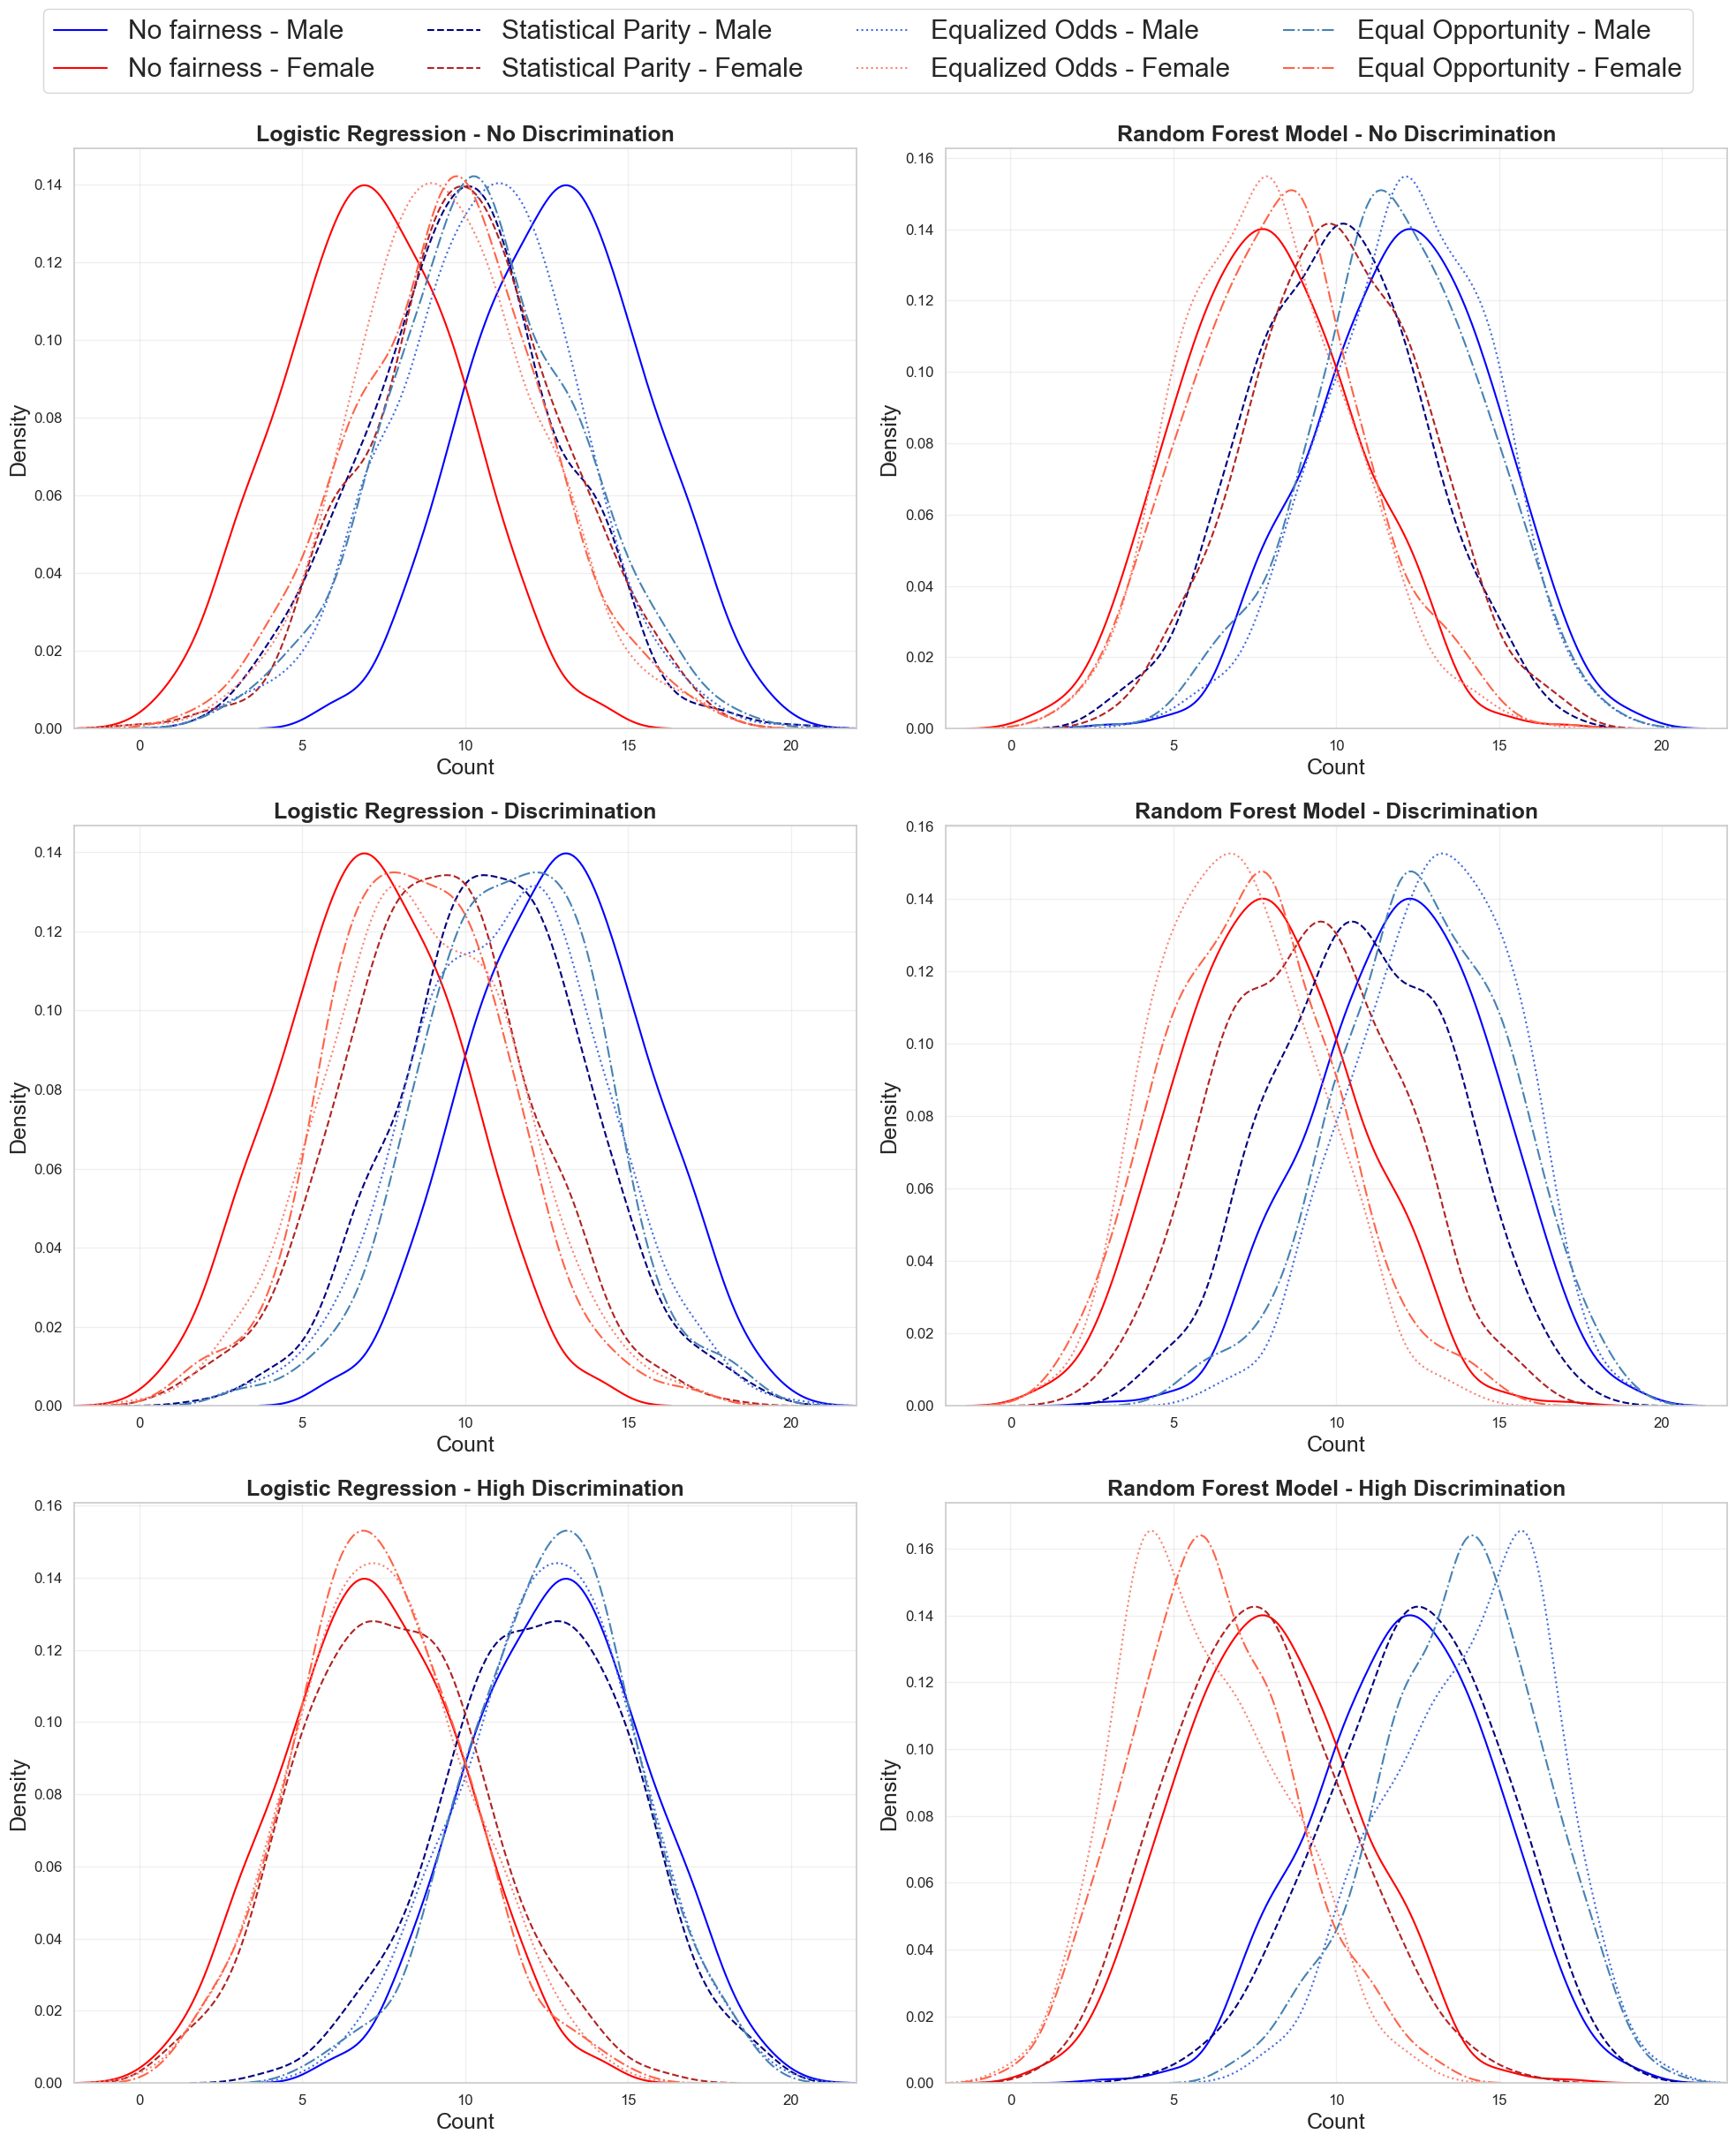

In [43]:
import matplotlib.pyplot as plt
import warnings

# Ignore specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# Define titles
logistic_titles = [
    "Logistic Regression - No Discrimination",
    "Logistic Regression - Discrimination",
    "Logistic Regression - High Discrimination"
]

rf_titles = [
    "Random Forest Model - No Discrimination",
    "Random Forest Model - Discrimination",
    "Random Forest Model - High Discrimination"
]

# Create a 3x2 subplot figure
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# Placeholder for handles and labels
legend_handles = None
legend_labels = None

# Plot Logistic Regression results (left column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_lm_1, results_lm_2, results_lm_3, results_lm_4), 
    logistic_titles
)):
    ax = axes[i, 0]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False  
    )
    if legend_handles is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()

# Plot Random Forest results (right column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_rf_1, results_rf_2, results_rf_3, results_rf_4), 
    rf_titles
)):
    ax = axes[i, 1]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False
    )

# Add a single shared legend above all plots
fig.legend(
    legend_handles,
    legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02), 
    ncol=4,
    fontsize='large'
)

# Adjust layout to make room for the top legend
plt.tight_layout(rect=[0, 0, 1, 0.97])  

# Save and display
fig.savefig('graphics/combined_logistic_rf_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Qualification Evaluation

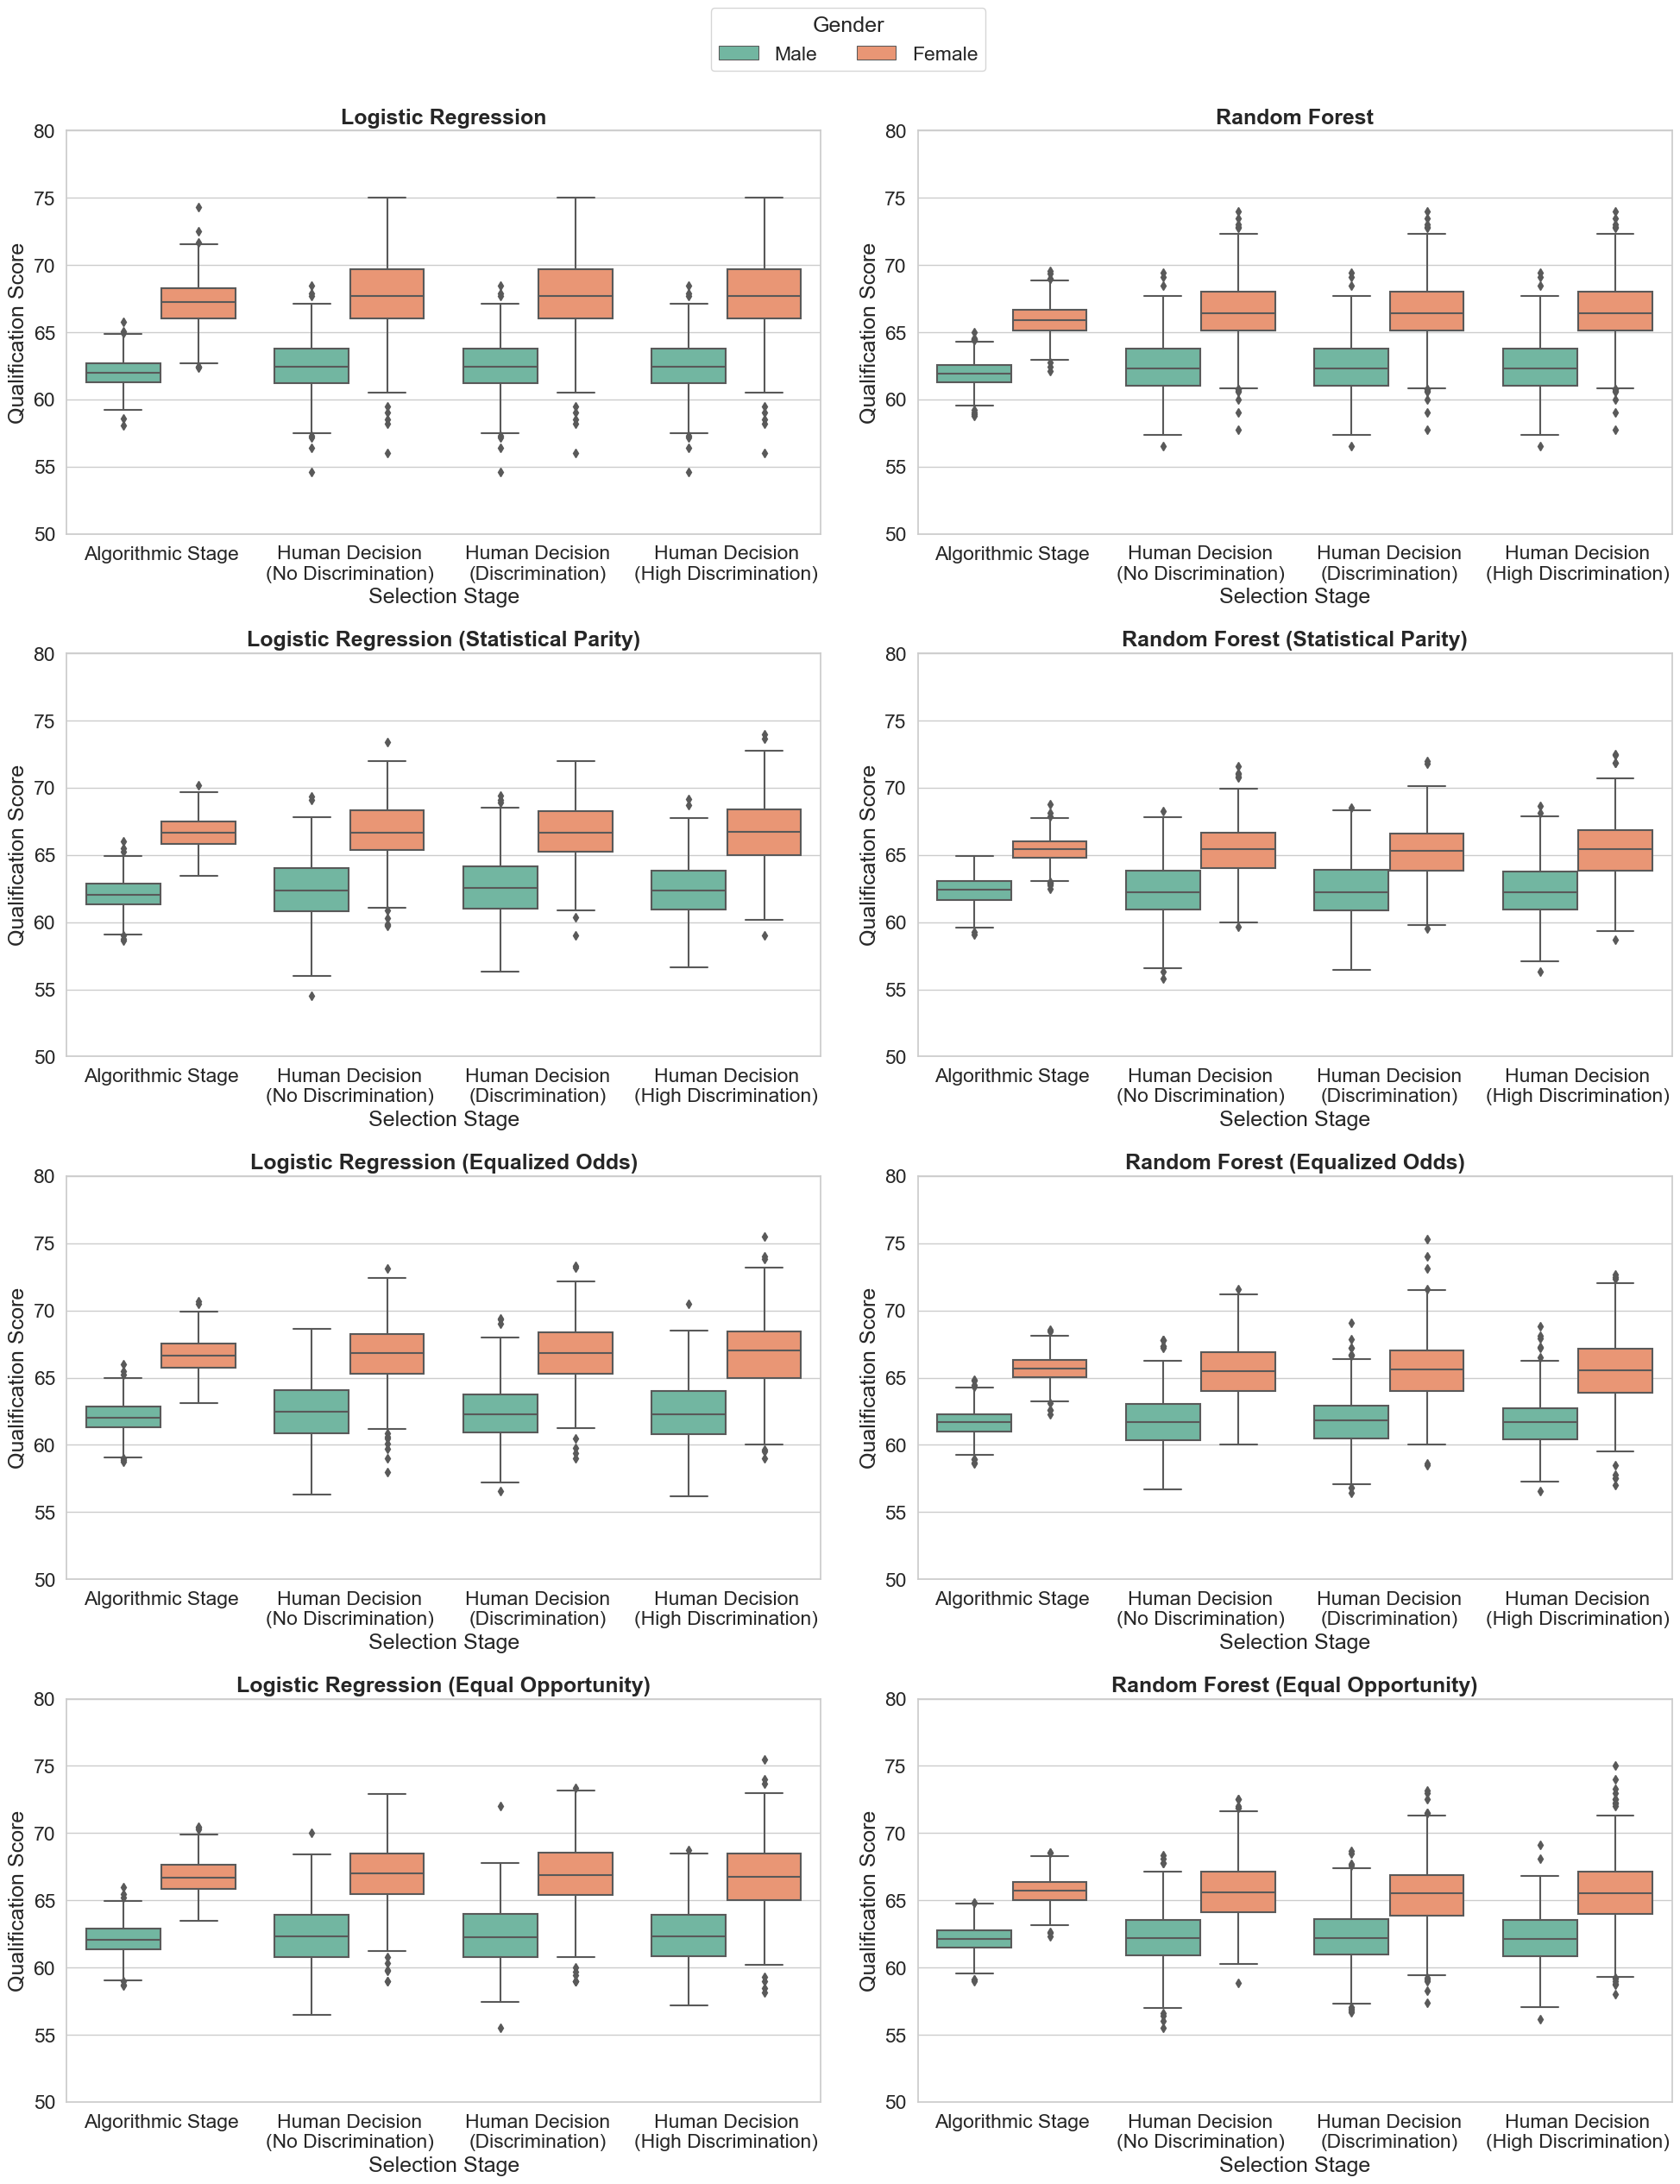

In [44]:
# Visualise Plot of Qualification
data_dict = {
    'rf_1': (
        qual_male_first_stage_df_rf_1,
        qual_female_first_stage_df_rf_1,
        qual_male_second_stage_df_rf_1,
        qual_female_second_stage_df_rf_1
    ),
    'rf_2': (
        qual_male_first_stage_df_rf_2,
        qual_female_first_stage_df_rf_2,
        qual_male_second_stage_df_rf_2,
        qual_female_second_stage_df_rf_2
    ),
    'rf_3': (
        qual_male_first_stage_df_rf_3,
        qual_female_first_stage_df_rf_3,
        qual_male_second_stage_df_rf_3,
        qual_female_second_stage_df_rf_3
    ),
    'rf_4': (
        qual_male_first_stage_df_rf_4,
        qual_female_first_stage_df_rf_4,
        qual_male_second_stage_df_rf_4,
        qual_female_second_stage_df_rf_4
    ),
    'lm_1': (
        qual_male_first_stage_df_lm_1,
        qual_female_first_stage_df_lm_1,
        qual_male_second_stage_df_lm_1,
        qual_female_second_stage_df_lm_1
    ),
    'lm_2': (
        qual_male_first_stage_df_lm_2,
        qual_female_first_stage_df_lm_2,
        qual_male_second_stage_df_lm_2,
        qual_female_second_stage_df_lm_2
    ),
    'lm_3': (
        qual_male_first_stage_df_lm_3,
        qual_female_first_stage_df_lm_3,
        qual_male_second_stage_df_lm_3,
        qual_female_second_stage_df_lm_3
    ),
    'lm_4': (
        qual_male_first_stage_df_lm_4,
        qual_female_first_stage_df_lm_4,
        qual_male_second_stage_df_lm_4,
        qual_female_second_stage_df_lm_4
    )
}

fig = qual_plot.visualize_qualification_grid(
    model_list=['lm_1', 'lm_2', 'lm_3', 'lm_4', 'rf_1', 'rf_2', 'rf_3', 'rf_4'],  
    variable_dict=data_dict,
    visualize_function=qual_plot.visualize_qualification_scores
)

plt.show()